In [1]:
import pandas as pd
import geopandas as gpd

import os

import contextily as ctx
import matplotlib.pyplot as plt
%matplotlib inline

## Local Authorities: Downloaded dataset

https://geoportal.statistics.gov.uk/datasets/local-athority-districts-december-2018-boundaries-gb-bfc

In [2]:
la = gpd.read_file("../data/raw/la")

In [3]:
la.head()

objectid    lad18cd              lad18nm lad18nmw   bng_e   bng_n     long  \
0       277  E08000021  Newcastle upon Tyne     None  422287  569662 -1.65297   

      lat    st_area(sh    st_length(  \
0  55.021  1.134562e+08  65248.297409   

                                            geometry  
0  POLYGON ((423225.702 574536.300, 423221.497 57...

(413668.56463499996, 430906.33826500014, 562231.6428599998, 576823.3549400002)

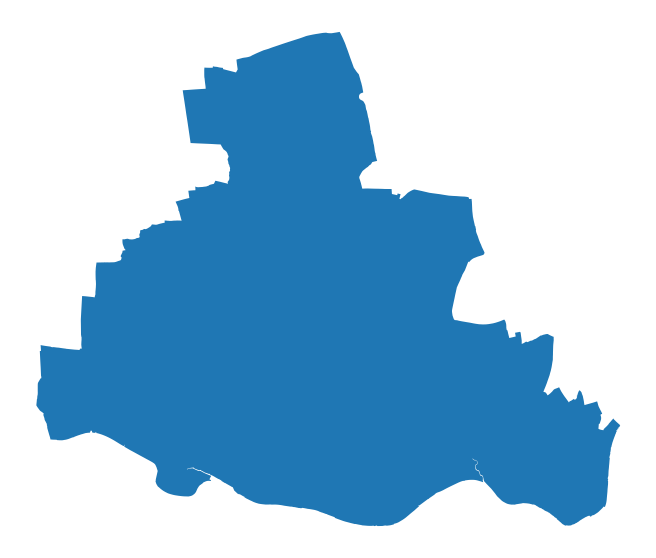

In [4]:
la.plot(cmap='tab20', figsize=(20,10))
plt.axis('off')

## Output Areas: Downloaded dataset
https://geoportal.statistics.gov.uk/datasets/output-area-december-2011-full-clipped-boundaries-in-england-and-wales?geometry=-1.623%2C54.976%2C-1.600%2C54.980

In [5]:
oa = gpd.read_file("../data/raw/oa")

In [6]:
oa.head()

FID     OA11CD    LAD11CD     Shape__Are   Shape__Len  \
0  40088  E00041363  E08000020  116560.173828  2202.037712   
1  40089  E00041364  E08000020   98109.313599  1628.502168   
2  40090  E00041366  E08000020   45092.584106  1158.473114   
3  40091  E00041367  E08000020  260509.623291  2969.159870   
4  40092  E00041368  E08000020  155887.999512  3533.149089   

                                            geometry  
0  POLYGON ((425993.545 562313.950, 425999.000 56...  
1  POLYGON ((425551.232 562290.629, 425551.176 56...  
2  POLYGON ((426568.429 562372.571, 426568.191 56...  
3  POLYGON ((426311.000 562385.221, 426311.000 56...  
4  POLYGON ((426739.477 562098.665, 426752.484 56...

(375946.6729, 444640.02509999997, 552485.997399997, 584632.190599999)

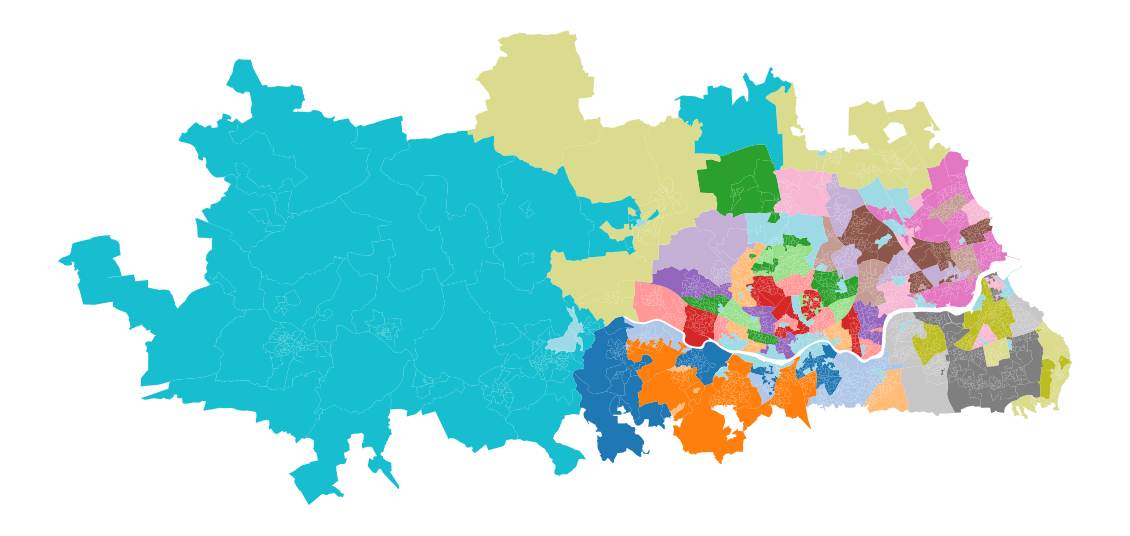

In [7]:
oa.plot(cmap='tab20', figsize=(20,10))
plt.axis('off')

## Newcastle upon Tyne Local Authority

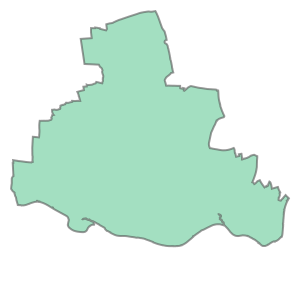

In [8]:
tyne_la = la[la["lad18nm"] == "Newcastle upon Tyne"].iloc[0]
tyne_la["geometry"]

## Output areas intersecting Newcastle Upon Tyne Local Authority

In [9]:
tyne_oa = oa[oa.intersects(tyne_la["geometry"])]

Captured output areas compared with local authority boundary:

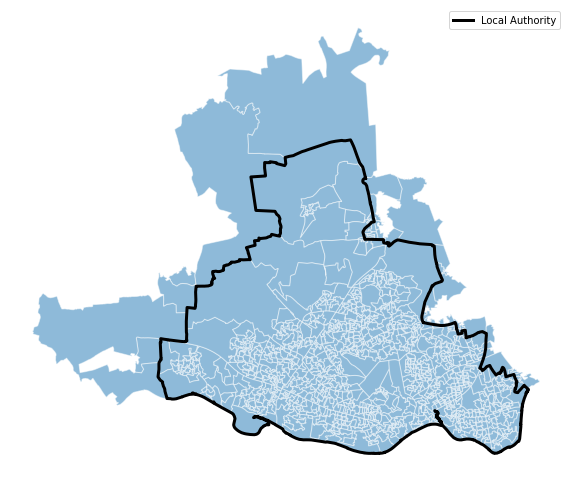

In [10]:
ax = plt.figure(figsize=(10,10)).gca()
x,y = tyne_la["geometry"].exterior.xy
ax.plot(x,y, 'k', linewidth=3)
tyne_oa.plot(alpha=0.5, ax=ax, edgecolor='white')
plt.axis('off')
plt.legend(["Local Authority"])

## With a base map (contextily)

https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html

Alternative map tiles:
https://wiki.openstreetmap.org/wiki/Tile_servers

<ipython-input-11-2755b0c31ea5>:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax,


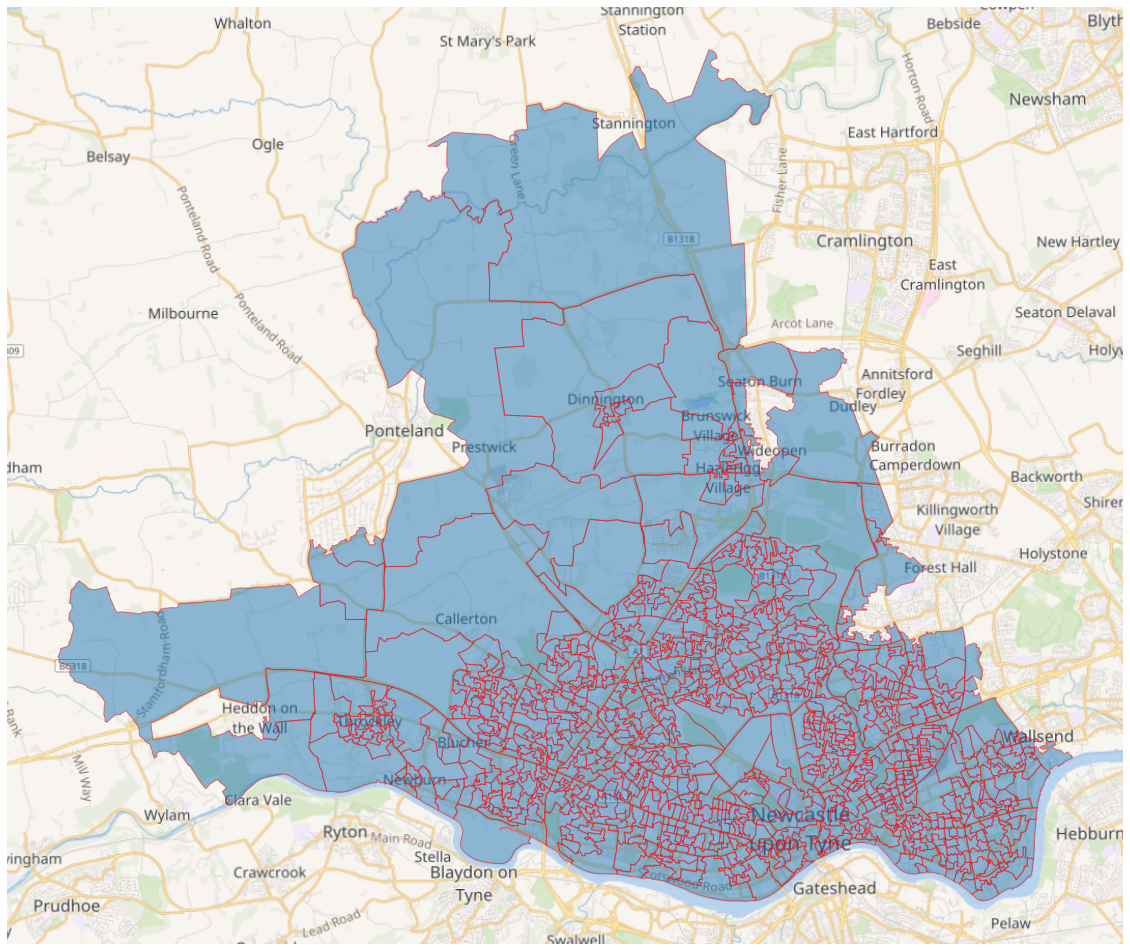

In [11]:
ax = tyne_oa.plot(figsize=(20,20),alpha=0.5, edgecolor="red")
ctx.add_basemap(ax,
                url="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png",
                crs=tyne_oa.crs)
ax.set_axis_off()

## Population Centroids
https://geoportal.statistics.gov.uk/datasets/output-areas-december-2011-population-weighted-centroids?geometry=-1.806%2C54.947%2C-1.440%2C55.016

In [12]:
centroids = gpd.read_file("../data/raw/centroids")
centroids["X"] = centroids.geometry.x
centroids["Y"] = centroids.geometry.y
centroids.head()

objectid     oa11cd                       geometry           X           Y
0     30454  E00139972  POINT (408618.737 562445.884)  408618.737  562445.884
1     30457  E00139970  POINT (409326.440 562881.452)  409326.440  562881.452
2     30460  E00139976  POINT (408750.916 562433.097)  408750.916  562433.097
3     30462  E00139977  POINT (408625.569 562226.199)  408625.569  562226.199
4     30463  E00139974  POINT (408975.600 562697.257)  408975.600  562697.257

## Population Estimates
https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/censusoutputareaestimatesinthenortheastregionofengland

In [14]:
populations = pd.read_csv("../data/raw/population_total.csv")
populations.head()

OA11CD  population
0  E00041378         292
1  E00041381         268
2  E00041382         171
3  E00041383         350
4  E00041386         568

FID     OA11CD    LAD11CD     Shape__Are   Shape__Len  \
479  40744  E00042042  E08000021  214155.744629  3492.481236   
480  40745  E00042043  E08000021  141302.081299  2314.149469   
481  40746  E00042044  E08000021  177916.885864  2895.815514   
482  40747  E00042045  E08000021   64858.009033  1241.047878   
483  40748  E00042046  E08000021  451704.930298  4988.032102   

                                              geometry      area  
479  POLYGON ((421301.772 564928.429, 421301.755 56...  0.070647  
480  POLYGON ((420572.364 564892.821, 420572.312 56...  0.046610  
481  POLYGON ((420492.559 564780.806, 420492.590 56...  0.058693  
482  POLYGON ((421543.715 563955.116, 421542.251 56...  0.021402  
483  POLYGON ((422292.813 563736.716, 422265.374 56...  0.149085

count    952.000000
mean       0.192458
std        1.174424
min        0.001419
25%        0.036030
50%        0.053451
75%        0.086122
max       21.908268
Name: area, dtype: float64

<AxesSubplot:>

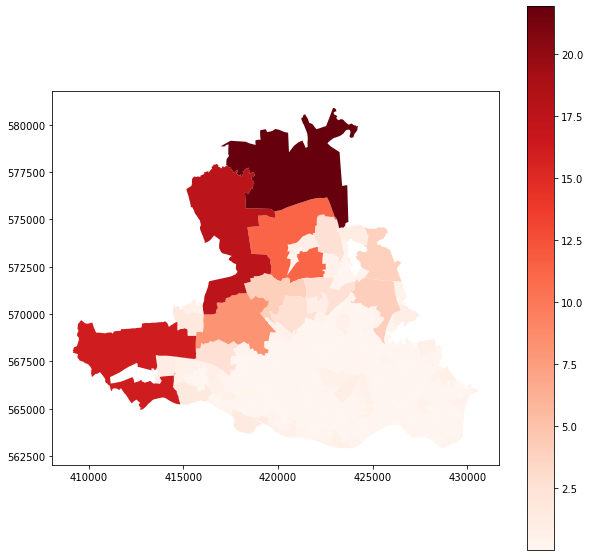

In [15]:
tyne_oa_crs = tyne_oa.to_crs(tyne_oa.crs)
tyne_oa_crs["area"] = tyne_oa_crs['geometry'].area/ 10**6
display(tyne_oa_crs.head())

display(tyne_oa_crs["area"].describe())

tyne_oa_crs.plot(column="area",
                 cmap="Reds",
                 figsize=(10,10),
                 legend=True)

In [16]:
ne_pop_with_centroids = centroids.merge(populations, left_on='oa11cd', right_on='OA11CD')
ne_pop_with_centroids.drop("OA11CD", axis=1, inplace=True)
ne_pop_with_centroids.head()

objectid     oa11cd                       geometry           X           Y  \
0     30454  E00139972  POINT (408618.737 562445.884)  408618.737  562445.884   
1     30457  E00139970  POINT (409326.440 562881.452)  409326.440  562881.452   
2     30460  E00139976  POINT (408750.916 562433.097)  408750.916  562433.097   
3     30462  E00139977  POINT (408625.569 562226.199)  408625.569  562226.199   
4     30463  E00139974  POINT (408975.600 562697.257)  408975.600  562697.257   

   population  
0         307  
1         217  
2         279  
3         298  
4         251

In [18]:
tyne_oa = tyne_oa.merge(ne_pop_with_centroids[["X", "Y", "oa11cd", "population"]],
                        how="left", right_on="oa11cd", left_on="OA11CD")


tyne_oa.head()

FID     OA11CD    LAD11CD     Shape__Are   Shape__Len  \
0  40744  E00042042  E08000021  214155.744629  3492.481236   
1  40745  E00042043  E08000021  141302.081299  2314.149469   
2  40746  E00042044  E08000021  177916.885864  2895.815514   
3  40747  E00042045  E08000021   64858.009033  1241.047878   
4  40748  E00042046  E08000021  451704.930298  4988.032102   

                                            geometry           X           Y  \
0  POLYGON ((421301.772 564928.429, 421301.755 56...  421259.393  564639.754   
1  POLYGON ((420572.364 564892.821, 420572.312 56...  420448.616  564819.213   
2  POLYGON ((420492.559 564780.806, 420492.590 56...  420509.207  564622.209   
3  POLYGON ((421543.715 563955.116, 421542.251 56...  421551.722  564088.460   
4  POLYGON ((422292.813 563736.716, 422265.374 56...  422116.597  563648.529   

      oa11cd  population  
0  E00042042       310.0  
1  E00042043       304.0  
2  E00042044       246.0  
3  E00042045       201.0  
4  E00042046       424.0

<ipython-input-19-9980b4b6860b>:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax,


Text(0.5, 1.0, 'Output Area Population Weighted Centroids')

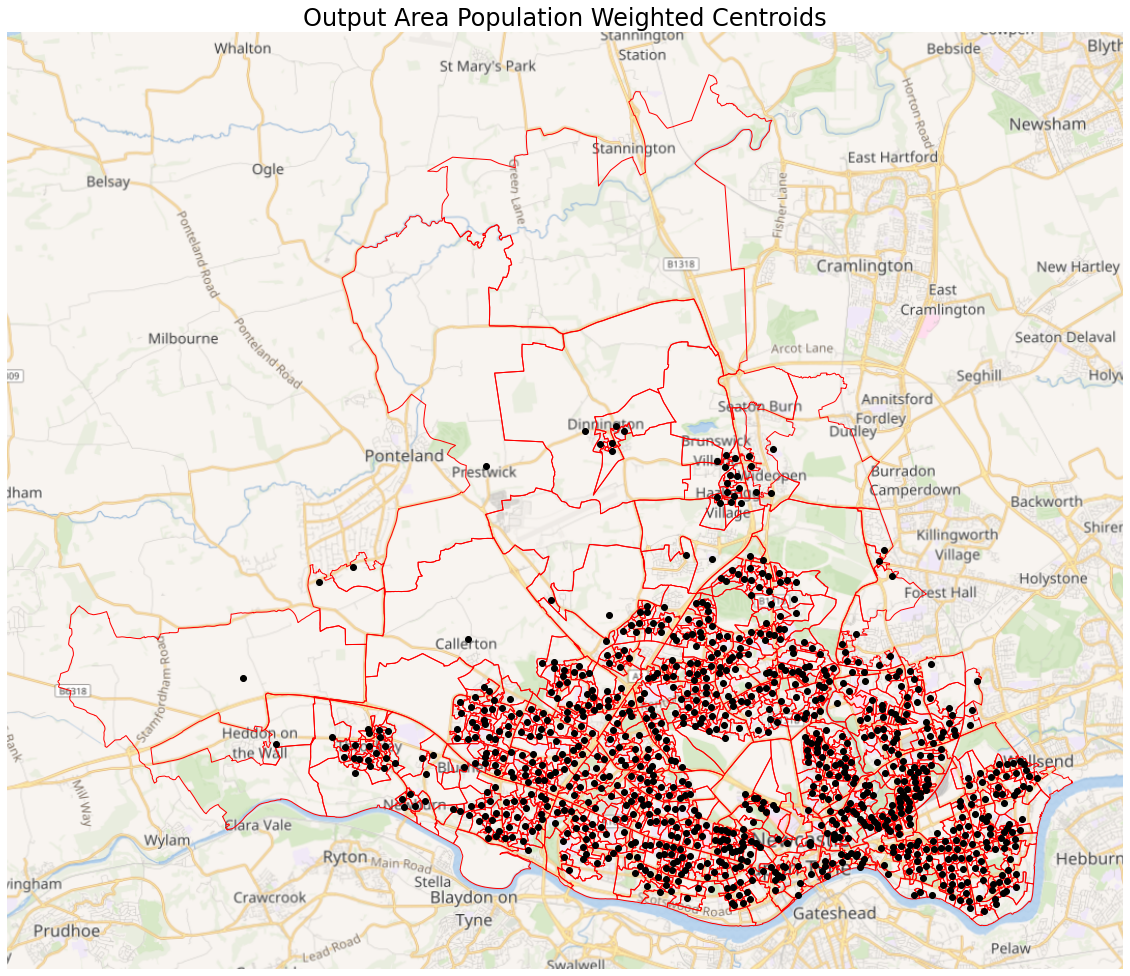

In [19]:
ax = tyne_oa.plot(figsize=(20,20), facecolor='none', edgecolor='red', linewidth=1)
ctx.add_basemap(ax,
                url="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png",
                crs=tyne_oa.crs)

x = tyne_oa["X"].values
y = tyne_oa["Y"].values
ax.scatter(x, y, color='k')

ax.set_axis_off()
plt.title("Output Area Population Weighted Centroids", fontsize=24)

#plt.tight_layout()
#plt.savefig("../data/img/oa_centroids.png", dpi=300)

## Density

In [21]:
tyne_oa["density"] = tyne_oa["population"] / tyne_oa["geometry"].area

# binned by decile
tyne_oa["density_bin"] = pd.qcut(tyne_oa["density"], q=10)

<ipython-input-22-4eaf09c5b60c>:5: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax,


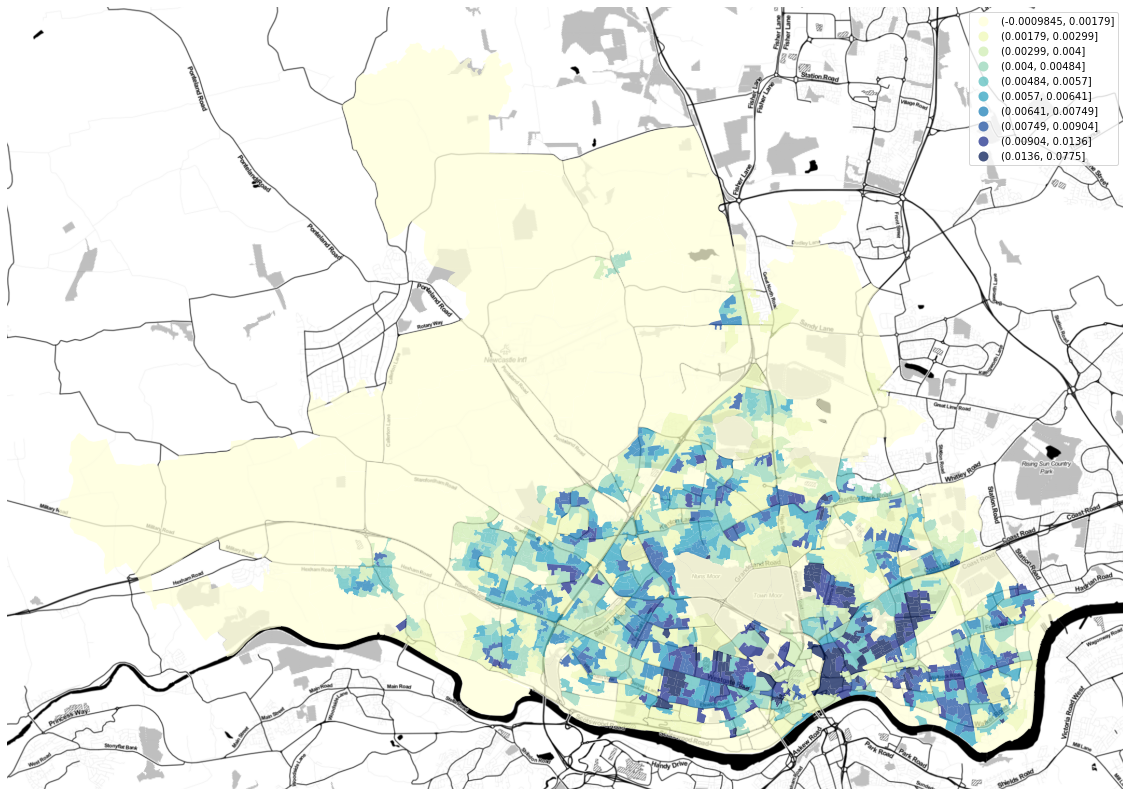

In [22]:
ax = tyne_oa.plot(column="density_bin",
                  figsize=(20,20),alpha=0.75,
                  cmap="YlGnBu", legend=True)

ctx.add_basemap(ax,
                url="http://a.tile.stamen.com/toner/{z}/{x}/{y}.png",
                crs=tyne_oa.crs)

ax.set_axis_off()